In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = 'Daily Household Transactions.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Preview the data
print(df.head())
print(df.info())
print(df.describe(include='all'))

                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  
<class 'pandas.core.frame.DataFrame'>


In [7]:
# Identify problematic rows
print("Original Dataset Info:")
print(df.info())

# Convert 'Date' to datetime, coercing errors
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Find rows where 'Date' conversion failed
invalid_dates = df[df['Date'].isna()]
print("\nRows with invalid date format:")
print(invalid_dates)

# Handle invalid dates safely
if not invalid_dates.empty:
    # Correct invalid rows without chained assignment
    df.loc[df['Date'].isna(), 'Date'] = pd.Timestamp('2000-01-01')  # Replace invalid dates
    # Alternatively, you could drop rows with invalid dates
    # df = df.dropna(subset=['Date'])

# Verify the cleaned data
print("\nCleaned Dataset Info:")
print(df.info())
print(df.head())

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   object        
 3   Subcategory     1826 non-null   object        
 4   Note            2461 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.9+ KB
None

Rows with invalid date format:
Empty DataFrame
Columns: [Date, Mode, Category, Subcategory, Note, Amount, Income/Expense, Currency]
Index: []

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 

In [8]:
# Convert currency if needed (example assumes converting to USD)
exchange_rates = {'USD': 1, 'EUR': 1.1, 'INR': 0.012}  # Example rates
df['Amount (USD)'] = df.apply(lambda row: row['Amount'] * exchange_rates[row['Currency']], axis=1)

# Add new columns for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.day_name()

print(df.head())

        Date                   Mode        Category              Subcategory  \
0 2000-01-01                   Cash  Transportation                    Train   
1 2000-01-01                   Cash            Food                   snacks   
2 2018-09-19  Saving Bank account 1    subscription                  Netflix   
3 2000-01-01  Saving Bank account 1    subscription  Mobile Service Provider   
4 2000-01-01                   Cash       Festivals             Ganesh Pujan   

                          Note  Amount Income/Expense Currency  Amount (USD)  \
0         2 Place 5 to Place 0    30.0        Expense      INR         0.360   
1  Idli medu Vada mix 2 plates    60.0        Expense      INR         0.720   
2         1 month subscription   199.0        Expense      INR         2.388   
3            Data booster pack    19.0        Expense      INR         0.228   
4                  Ganesh idol   251.0        Expense      INR         3.012   

   Year  Month  Day Day of Week  
0  2

In [9]:
# Convert currency if needed (example assumes converting to USD)
exchange_rates = {'USD': 1, 'EUR': 1.1, 'INR': 0.012}  # Example rates
df['Amount (USD)'] = df.apply(lambda row: row['Amount'] * exchange_rates[row['Currency']], axis=1)

# Add new columns for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.day_name()

print(df.head())

        Date                   Mode        Category              Subcategory  \
0 2000-01-01                   Cash  Transportation                    Train   
1 2000-01-01                   Cash            Food                   snacks   
2 2018-09-19  Saving Bank account 1    subscription                  Netflix   
3 2000-01-01  Saving Bank account 1    subscription  Mobile Service Provider   
4 2000-01-01                   Cash       Festivals             Ganesh Pujan   

                          Note  Amount Income/Expense Currency  Amount (USD)  \
0         2 Place 5 to Place 0    30.0        Expense      INR         0.360   
1  Idli medu Vada mix 2 plates    60.0        Expense      INR         0.720   
2         1 month subscription   199.0        Expense      INR         2.388   
3            Data booster pack    19.0        Expense      INR         0.228   
4                  Ganesh idol   251.0        Expense      INR         3.012   

   Year  Month  Day Day of Week  
0  2

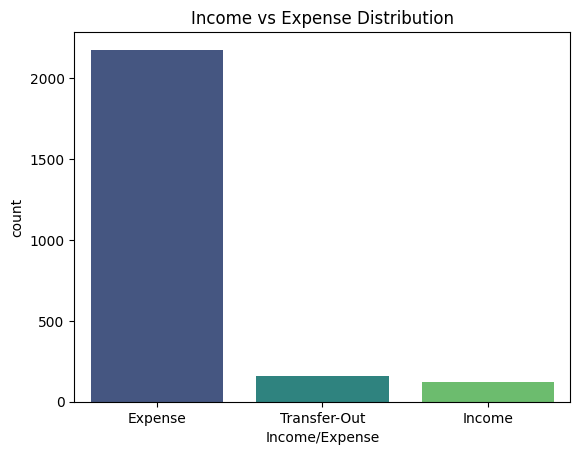

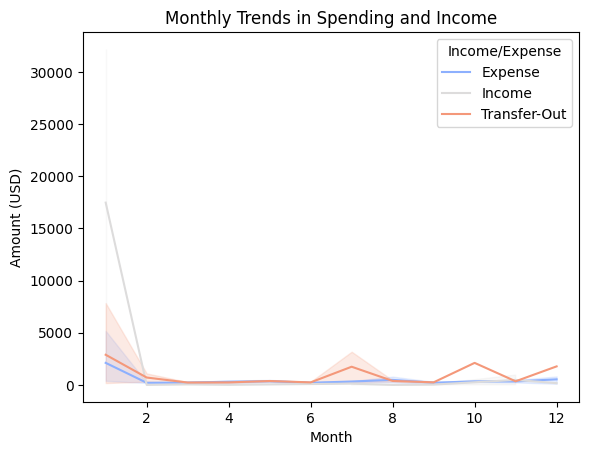

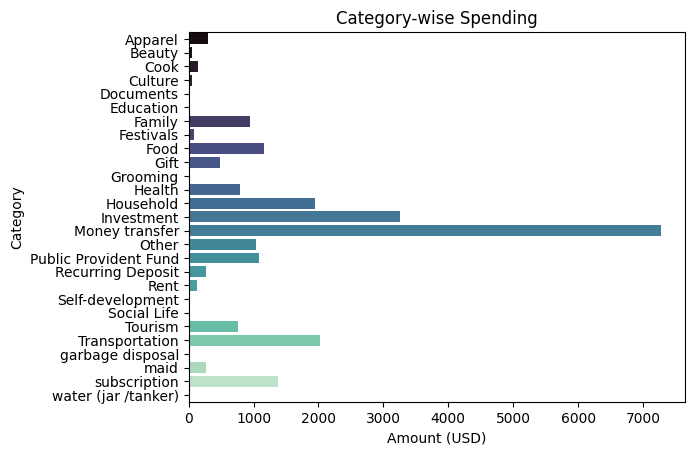

In [12]:
# Income vs Expense distribution
sns.countplot(data=df, x='Income/Expense', hue='Income/Expense', palette='viridis', dodge=False, legend=False)
plt.title('Income vs Expense Distribution')
plt.show()

# Monthly trends in spending and income
monthly_data = df.groupby(['Year', 'Month', 'Income/Expense'])['Amount (USD)'].sum().reset_index()
sns.lineplot(data=monthly_data, x='Month', y='Amount (USD)', hue='Income/Expense', palette='coolwarm')
plt.title('Monthly Trends in Spending and Income')
plt.show()

# Category-wise spending
sns.barplot(data=category_expense, x='Amount (USD)', y='Category', hue='Category', palette='mako', dodge=False, legend=False)
plt.title('Category-wise Spending')
plt.show()

In [13]:
# Summary statistics
income_expense_summary = df.groupby('Income/Expense')['Amount (USD)'].agg(['sum', 'mean', 'max', 'min']).reset_index()
print(income_expense_summary)

# Save to file
income_expense_summary.to_csv('financial_summary.csv', index=False)

# Monthly summary
monthly_summary = df.groupby(['Year', 'Month', 'Income/Expense'])['Amount (USD)'].sum().reset_index()
monthly_summary_pivot = monthly_summary.pivot(index=['Year', 'Month'], columns='Income/Expense', values='Amount (USD)').fillna(0)
monthly_summary_pivot.to_csv('monthly_summary.csv')

  Income/Expense          sum        mean       max      min
0        Expense  23488.68636   10.794433  1200.000  0.02400
1         Income  36508.76820  292.070146  1360.512  0.02400
2   Transfer-Out  21249.37080  132.808568  3000.000  0.51456


In [15]:
# Generate a PDF report with key visuals (using Matplotlib and PDF generation tools)
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('financial_report.pdf') as pdf:
    # Income vs Expense pie chart
    income_expense_totals = df.groupby('Income/Expense')['Amount (USD)'].sum()
    income_expense_totals.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5722'])
    plt.title('Income vs Expense Distribution')
    pdf.savefig()  # Save this figure to the PDF
    plt.close()

    # Monthly trends
    sns.lineplot(data=monthly_data, x='Month', y='Amount (USD)', hue='Income/Expense')
    plt.title('Monthly Trends')
    pdf.savefig()
    plt.close()

    # Category spending
    sns.barplot(data=category_expense, x='Amount (USD)', y='Category')
    plt.title('Spending by Category')
    pdf.savefig()
    plt.close()

print("Report generated as 'financial_report.pdf'.")

Report generated as 'financial_report.pdf'.
